In [7]:
import time
import numpy as np
pi=np.pi
from astropy.table import Table, Column, MaskedColumn
from astropy.io import ascii
import matplotlib.pyplot as plt
from prep_data import *
from TOV_integrators import *
xmsun=1.4766

In [13]:
energy, pressure, normalized_density = load('eosNL3or_unified_td.dat')

In [14]:
index=np.where((normalized_density>=.4))[0]
central_densities=pressure[index]

In [15]:
mass=[]
radius=[]
start = time.time()
for i in range(len(central_densities)):
    sol1,sol2,sol3=TOV_integrals(central_densities[i], pressure, energy)
    radius.append(sol1)
    mass.append(sol2)
    
mass=np.array(mass)/xmsun
radius=np.array(radius)    
end = time.time()

print ('ToV solution took:',(end -start),"seconds")

ToV solution took: 1.1445965766906738 seconds


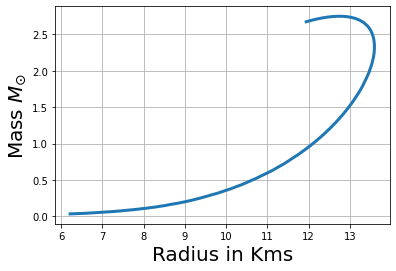

In [16]:
plt.plot(radius,mass, linewidth=3.0)
plt.grid()
plt.ylabel(r'Mass $M_{\odot}$' ,fontsize=20)
plt.xlabel(r'Radius in Kms', fontsize=20)
plt.show()